In [1]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


## Explore assembly files

In [4]:
assembly_dir = '/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006'

In [5]:
!ls -lh {assembly_dir}

total 115M
-rw-rw-r-- 1 aliman aliman 14M Apr  7 11:45 plasmodium_falciparum__isolate_7g8__1_contigs.fasta
-rw-rw-r-- 1 aliman aliman 15M Apr  7 11:45 plasmodium_falciparum__isolate_7g8__1_supercontigs.fasta
-rw-rw-r-- 1 aliman aliman 20M Apr  7 11:45 plasmodium_falciparum__isolate_dd2__1_contigs.fasta
-rw-rw-r-- 1 aliman aliman 21M Apr  7 11:45 plasmodium_falciparum__isolate_dd2__1_supercontigs.fasta
-rw-rw-r-- 1 aliman aliman 24M Apr  7 11:45 plasmodium_falciparum__isolate_hb3__1_contigs.fasta
-rw-rw-r-- 1 aliman aliman 24M Apr  7 11:45 plasmodium_falciparum__isolate_hb3__1_supercontigs.fasta


In [6]:
fasta_hb3_contigs = os.path.join(assembly_dir, 'plasmodium_falciparum__isolate_hb3__1_contigs.fasta')
fasta_hb3_supercontigs = os.path.join(assembly_dir, 'plasmodium_falciparum__isolate_hb3__1_supercontigs.fasta')

In [7]:
!head {fasta_hb3_contigs}

>AANS01000001 | CONTIG_1 | part of supercont1.1 of Plasmodium falciparum (isolate hb3) | [1-1318] | 1318 nt 
TTCTGATACCACATTAAACATATATATATATATATATATACTATATATTGTGTATGTATT
TCAATTTGAAAATTATGGTGATAATTTATATAGGACTTCTATATAATCATCGTAGGATCA
TTTACAATTAAATATGTGCAGTATATATTTATTTAACATAATATATAATATATTTATTTG
AAAGGTAGAGAAAACTCATCATATAAGTACTATTAAATGTAGTACATAATTATTGAAATA
AAAATTCAATGTATTCTTGTTTTTTTTTTTTTTATCTTGTTTCAATATTGTTCTTTTCGA
ACTATTTTTGCATAATAAAAGAAAAAATAATAACATAAAAATTTTGGAAGTGTTATGAAA
TTAAAAAAAGAAAAAATATTCCTACGTCTTAATACCTTTCTTTAAAATGCATATAGGAAT
ACAATAATATTATAATATAATTCAAAAAGAATTTATTCATTTCCTTTTTTCTTTTTTTTA
TTTTTTCTCTATTCTTTTTAAAAGATACCTATTTATAAGCATATAATATGCATAATTATA


In [8]:
!head {fasta_hb3_supercontigs}

>Supercontig_1.1 of Plasmodium falciparum (isolate HB3)
TTCTGATACCACATTAAACATATATATATATATATATATACTATATATTGTGTATGTATT
TCAATTTGAAAATTATGGTGATAATTTATATAGGACTTCTATATAATCATCGTAGGATCA
TTTACAATTAAATATGTGCAGTATATATTTATTTAACATAATATATAATATATTTATTTG
AAAGGTAGAGAAAACTCATCATATAAGTACTATTAAATGTAGTACATAATTATTGAAATA
AAAATTCAATGTATTCTTGTTTTTTTTTTTTTTATCTTGTTTCAATATTGTTCTTTTCGA
ACTATTTTTGCATAATAAAAGAAAAAATAATAACATAAAAATTTTGGAAGTGTTATGAAA
TTAAAAAAAGAAAAAATATTCCTACGTCTTAATACCTTTCTTTAAAATGCATATAGGAAT
ACAATAATATTATAATATAATTCAAAAAGAATTTATTCATTTCCTTTTTTCTTTTTTTTA
TTTTTTCTCTATTCTTTTTAAAAGATACCTATTTATAAGCATATAATATGCATAATTATA


In [22]:
def genome_diagnostics(genome):
    n_contigs = len(genome.keys())
    log('n_contigs', n_contigs)
    contig_lens = [len(genome[contig]) for contig in genome.keys()]
    n_bases = sum(contig_lens)
    log('n_bases', n_bases)
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.despine(ax=ax, offset=10)
    ax.hist(contig_lens, bins=30)
    ax.set_xlabel('contig length')
    ax.set_ylabel('frequency')

2015-04-07 18:06:54.319653 :: n_contigs 2971
2015-04-07 18:06:54.325606 :: n_bases 23431386


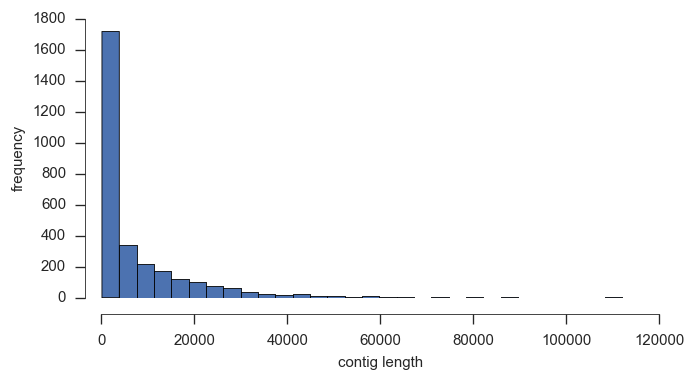

In [23]:
genome_hb3_contigs = pyfasta.Fasta(fasta_hb3_contigs, key_fn=lambda v: v.split()[0])
genome_diagnostics(genome_hb3_contigs)

2015-04-07 18:07:05.109770 :: n_contigs 1189
2015-04-07 18:07:05.114315 :: n_bases 24258511


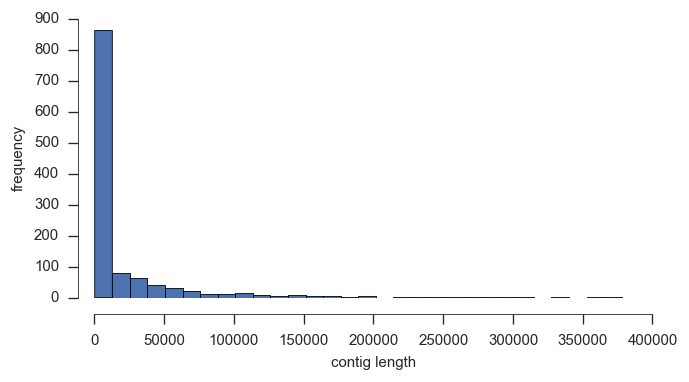

In [24]:
genome_hb3_supercontigs = pyfasta.Fasta(fasta_hb3_supercontigs, key_fn=lambda v: v.split()[0])
genome_diagnostics(genome_hb3_supercontigs)

## Investigate alignment with 3D7 version 3

In [27]:
fasta_3d7_v3 = '/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/Pf3D7_v3.fa'
!head {fasta_3d7_v3}

>Pf3D7_01_v3
tgaaccctaaaacctaaaccctaaaccctaaaccctgaaccctaaaccctgaaccctaaa
ccctaaaccctgaaccctaaaccctaaaccctgaaccctaaaccctgaaacctaaaccct
gaaccctaaaccctgaaccctgaaccctaaccctaaaccctaaacctaaaaccctgaacc
ctaaaccctgaaccctgaaccctaaaccctgaaccctaaaccctaaaccctgaaccctaa
accctgaaccctaaaccctaaaccctgaaccctgaaccctaaaacctaaaccctaaaccc
taaaccctaaaccctgaacctaaacctaaaacctaaaacctaaaaccctgaacccttact
tttcatttcttcttcttatcttcttacttttcattctttactcttacttacttagtctta
cttacttactcttacttacttactcttatcttcttacttttcatttcttagtcttactta
cttactcttacttacttactcttatcttcttacttttcattccttactcttacttactta


2015-04-07 18:11:52.728468 :: n_contigs 14
2015-04-07 18:11:52.729473 :: n_bases 23292622


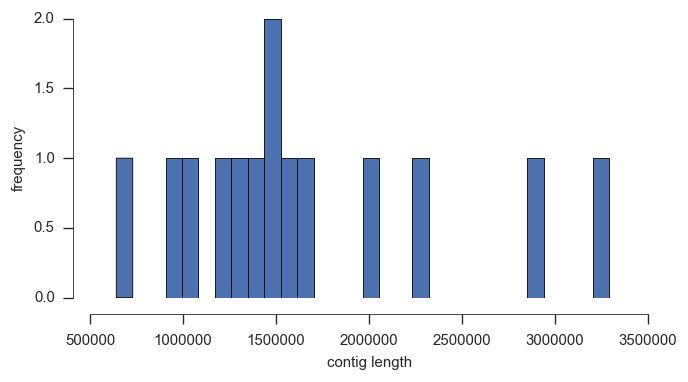

In [28]:
genome_3d7_v3 = pyfasta.Fasta(fasta_3d7_v3)
genome_diagnostics(genome_3d7_v3)

In [26]:
!dnadiff -h


  USAGE: dnadiff  [options]  <reference>  <query>
    or   dnadiff  [options]  -d <delta file>

  DESCRIPTION:
    Run comparative analysis of two sequence sets using nucmer and its
    associated utilities with recommended parameters. See MUMmer
    documentation for a more detailed description of the
    output. Produces the following output files:

    .report  - Summary of alignments, differences and SNPs
    .delta   - Standard nucmer alignment output
    .1delta  - 1-to-1 alignment from delta-filter -1
    .mdelta  - M-to-M alignment from delta-filter -m
    .1coords - 1-to-1 coordinates from show-coords -THrcl .1delta
    .mcoords - M-to-M coordinates from show-coords -THrcl .mdelta
    .snps    - SNPs from show-snps -rlTHC .1delta
    .rdiff   - Classified ref breakpoints from show-diff -rH .mdelta
    .qdiff   - Classified qry breakpoints from show-diff -qH .mdelta
    .unref   - Unaligned reference IDs and lengths (if applicable)
    .unqry   - Unaligned query IDs and length

In [29]:
!cd {assembly_dir} && echo `pwd`

/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006


In [30]:
align_3d7_hb3_dir = os.path.join(assembly_dir, 'mummer/3d7_hb3')
os.makedirs(align_3d7_hb3_dir)

In [ ]:
!cd {align_3d7_hb3_dir} && dnadiff -p 3d7_hb3 {fasta_3d7_v3} {fasta_hb3_supercontigs}

Building alignments
1: PREPARING DATA
2,3: RUNNING mummer AND CREATING CLUSTERS
# reading input file "3d7_hb3.ntref" of length 23292636
# construct suffix tree for sequence of length 23292636
# (maximum reference length is 536870908)
# (maximum query length is 4294967295)
# process 232926 characters per dot
#....................................................................................................
# CONSTRUCTIONTIME /usr/bin/mummer 3d7_hb3.ntref 8.68
# reading input file "/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/plasmodium_falciparum__isolate_hb3__1_supercontigs.fasta" of length 24259699
# matching query-file "/data/plasmodium/pfalciparum/pf-crosses/data/reference/birren_2006/plasmodium_falciparum__isolate_hb3__1_supercontigs.fasta"
# against subject-file "3d7_hb3.ntref"
